# Carbon Emission India Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d1 = pd.read_csv('../input/carbon-emission-india/CarbonEmissionIndia.csv')
d1.head(10)

,States,per capita CO2 (kg per person),per capita CO (kg per person),per capita CH4 (kg per person)
0,Andhra Pradesh,974.17,27.18,16.97
1,Arunachal,405.90,17.43,25.82
2,Assam,340.91,16.63,21.29
3,Bihar,179.01,8.83,9.59
4,Chattisgarh,1963.88,17.56,22.37
5,Goa,2662.51,23.12,7.62
6,Gujarat,1310.58,24.01,12.26
7,Haryana,1381.86,17.90,21.57
8,Himachal Pradesh,784.16,16.98,18.28
9,Jammu & Kashmir,509.03,15.59,14.42


In [3]:
d1.shape

(28, 4)

In [4]:
d1.corr()

,per capita CO2 (kg per person),per capita CO (kg per person),per capita CH4 (kg per person)
per capita CO2 (kg per person),1.000000,0.516380,0.044667
per capita CO (kg per person),0.516380,1.000000,0.135935
per capita CH4 (kg per person),0.044667,0.135935,1.000000


In [5]:
d1.columns

Index(['States', 'per capita CO2 (kg per person)',
       'per capita CO (kg per person)', 'per capita CH4 (kg per person)'],
      dtype='object')

In [6]:
d1.describe()

,per capita CO2 (kg per person),per capita CO (kg per person),per capita CH4 (kg per person)
count,28.000000,28.000000,28.000000
mean,894.401071,18.293214,16.549286
std,547.619397,5.258928,6.599384
min,179.010000,8.830000,4.520000
25%,505.025000,14.847500,11.830000
50%,771.625000,17.495000,15.690000
75%,1058.092500,23.235000,20.232500
max,2662.510000,27.900000,33.380000


In [7]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   States                          28 non-null     object 
 1   per capita CO2 (kg per person)  28 non-null     float64
 2   per capita CO (kg per person)   28 non-null     float64
 3   per capita CH4 (kg per person)  28 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.0+ KB


array([[<AxesSubplot:title={'center':'per capita CO2 (kg per person)'}>,
        <AxesSubplot:title={'center':'per capita CO (kg per person)'}>],
       [<AxesSubplot:title={'center':'per capita CH4 (kg per person)'}>,
        <AxesSubplot:>]], dtype=object)

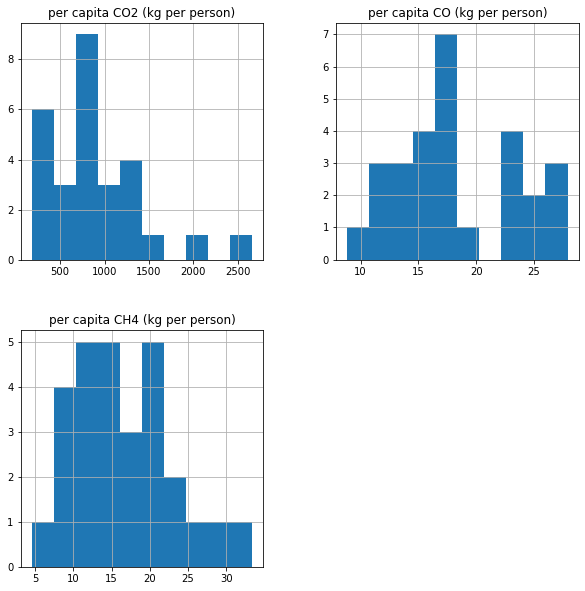

In [8]:
d1.hist(figsize=(10,10))

In [9]:
# Check for null value count
d1.isnull().sum()

States                            0
per capita CO2 (kg per person)    0
per capita CO (kg per person)     0
per capita CH4 (kg per person)    0
dtype: int64

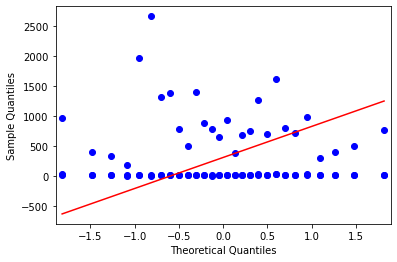

In [10]:
from statsmodels.graphics.gofplots import qqplot

qqplot(d1[['per capita CO2 (kg per person)','per capita CO (kg per person)', 'per capita CH4 (kg per person)']],line='s')
plt.show()

In [11]:
from scipy.stats import skew

print(skew(d1[['per capita CO2 (kg per person)','per capita CO (kg per person)', 'per capita CH4 (kg per person)']]))

[1.42821594 0.2642628  0.55688343]


Data is not following Normal/Gaussian Distribution.<br>
Needs to be scaled.

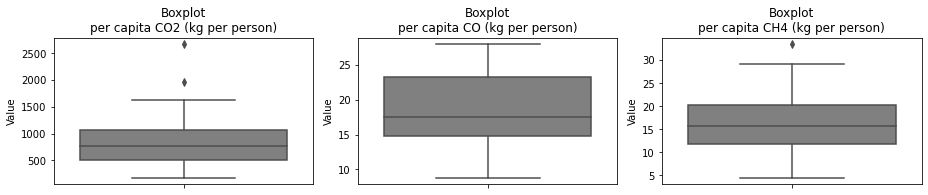

In [12]:
plt.figure(figsize=(13,5))

for feat, grd in zip(d1[['per capita CO2 (kg per person)','per capita CO (kg per person)', 'per capita CH4 (kg per person)']], range(231,237)):
    plt.subplot(grd)
    sns.boxplot(y=d1[feat], color='grey')
    plt.ylabel('Value')
    plt.title('Boxplot\n%s'%feat)
plt.tight_layout()

In [13]:
y1 = d1['States']
X1 = d1[['per capita CO2 (kg per person)','per capita CO (kg per person)', 'per capita CH4 (kg per person)']]

(28, 3)


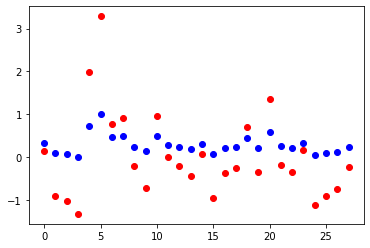

In [14]:
# Scaling Data using Min-Max Scaler

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_norm_1 = mms.fit_transform(X1)

# Scaling Data using Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
X_std_1 = scaler.transform(X1)


# Comparing Scaled Data

xx = np.arange(len(X_std_1))
yy1 = X_norm_1[:,0]
yy2 = X_std_1[:,0]
plt.scatter(xx,yy1,color='b')
plt.scatter(xx,yy2,color='r')

print(X_std_1.shape)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_1 = pca.fit_transform(X_norm_1)

In [16]:
from sklearn.cluster import KMeans

model1 = KMeans(random_state=21,n_clusters=3)
model1.fit(X_pca_1)

KMeans(n_clusters=3, random_state=21)

In [17]:
model1.labels_

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 0, 1], dtype=int32)

In [18]:
k1=model1.cluster_centers_
k1

array([[-0.21451507,  0.01945071],
       [ 0.28404329, -0.12960032],
       [ 0.54518331,  0.41787041]])

In [19]:
s = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_pca_1)
    s.append(kmeans.inertia_)

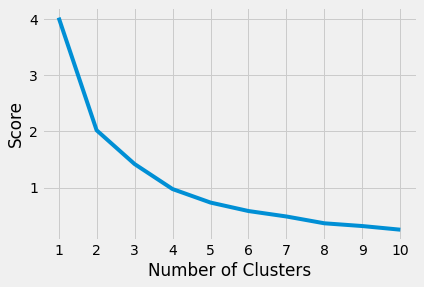

In [20]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), s)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.show()

In [21]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [22]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),s,curve="convex",direction="decreasing")
kl.elbow

4

### Elbow point obtained is 4